In [1]:
cd ~/data/ciss/img_from_miodraks_set/

/Users/klay6683/data/ciss/img_from_miodraks_set


In [2]:
ls *.png

real_waves_or_not.png  view_export.png


In [3]:
from skimage.io import imread

In [4]:
img = imread('./view_export.png')

In [5]:
img = img[...,0]

In [6]:
from skimage.transform import (hough_line, hough_line_peaks, probabilistic_hough_line)

In [88]:
from skimage.transform import (hough_line, hough_line_peaks,
                               probabilistic_hough_line)
from skimage.feature import canny
from skimage import data

import numpy as np
import matplotlib.pyplot as plt

# Construct test image

image = np.zeros((100, 100))


# Classic straight-line Hough transform

idx = np.arange(25, 75)
image[idx[::-1], idx] = 255
image[idx, idx] = 255

In [8]:
image = img

In [10]:
%matplotlib inline

In [98]:
import seaborn as sns
sns.set_context('talk')
sns.set_style('dark')

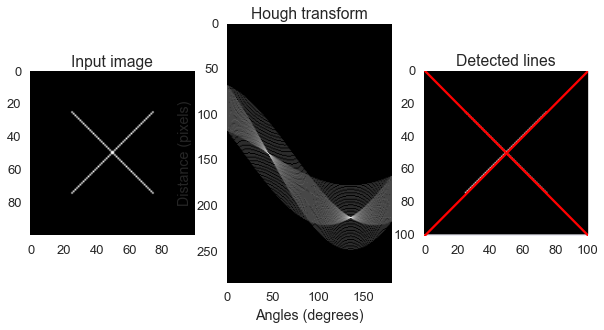

In [102]:
h, theta, d = hough_line(image)

fig, ax = plt.subplots(1, 3, figsize=figsize_43(10))

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Input image')
ax[0].axis('image')

ax[1].imshow(np.log(1 + h),
#            extent=[np.rad2deg(theta[-1]), np.rad2deg(theta[0]),
#                    d[-1], d[0]],
           cmap=plt.cm.gray, aspect='equal')

with sns.axes_style('darkgrid'):
    ax[1].set_title('Hough transform')
    ax[1].set_xlabel('Angles (degrees)')
    ax[1].set_ylabel('Distance (pixels)')
    ax[1].axis('image')

ax[2].imshow(image, cmap=plt.cm.gray)
rows, cols = image.shape
for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
    y0 = (dist - 0 * np.cos(angle)) / np.sin(angle)
    y1 = (dist - cols * np.cos(angle)) / np.sin(angle)
    ax[2].plot((0, cols), (y0, y1), '-r')
ax[2].axis((0, cols, rows, 0))
ax[2].set_title('Detected lines')
ax[2].axis('image')
fig.savefig('simple_houghtransform_demo.png', dpi=100)

In [83]:
def figsize_43(width):
    
    return width, 3*width/4.0

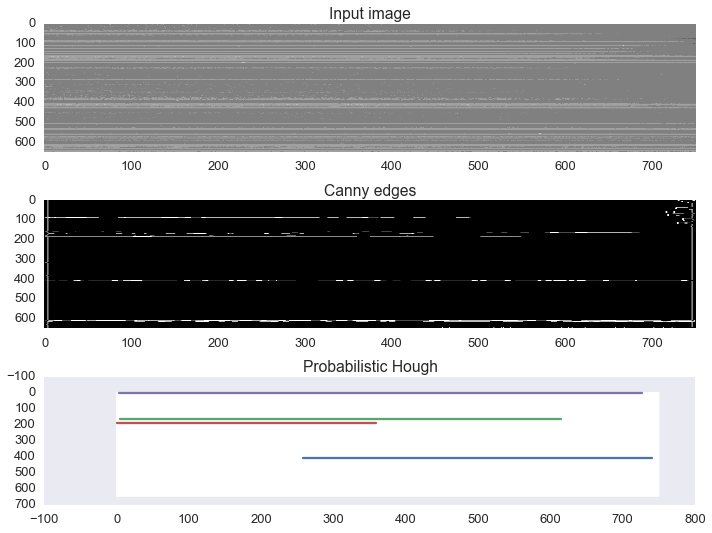

In [104]:
image = ubyted
edges = canny(image, 1, 3, 4)
lines = probabilistic_hough_line(edges, threshold=10, line_length=300, line_gap=3)

fig2, ax = plt.subplots(nrows=3, figsize=figsize_43(10))

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Input image')
# ax[0].axis('image')

ax[1].imshow(edges, cmap=plt.cm.gray)
ax[1].set_title('Canny edges')
# ax[1].axis('image')

ax[2].imshow(edges * 0)

for line in lines:
    p0, p1 = line
    ax[2].plot((p0[0], p1[0]), (p0[1], p1[1]))

ax[2].set_title('Probabilistic Hough')
# ax[2].axis('image')
fig2.tight_layout()
plt.show()
fig2.savefig('prob_hough_transform_demo.png',dpi=100)

In [86]:
pwd

u'/Users/klay6683/data/ciss/opus'

In [81]:
lines

[((258, 409), (741, 409)),
 ((5, 165), (615, 165)),
 ((1, 188), (359, 188)),
 ((3, 4), (727, 4))]

# N1554730872_1.IMG

In [75]:
cd ~/data/ciss/opus

/Users/klay6683/data/ciss/opus


In [32]:
from pyciss import pipeline

In [56]:
pipeline.calibrate_ciss('/Users/klay6683/data/ciss/opus/N1595336719_1.LBL')

'/Users/klay6683/data/ciss/opus/N1595336719_1.map.cal.cub'

In [19]:
cd ~/data/ciss/opus

/Users/klay6683/data/ciss/opus


In [57]:
import gdal
ds = gdal.Open('/Users/klay6683/data/ciss/opus/N1595336719_1.map.cal.cub')

In [58]:
data= ds.ReadAsArray()
data[data<0]= np.nan

In [59]:
data.shape

(1364, 1535)

In [60]:
subframe = data[400:1050, 500:1250]

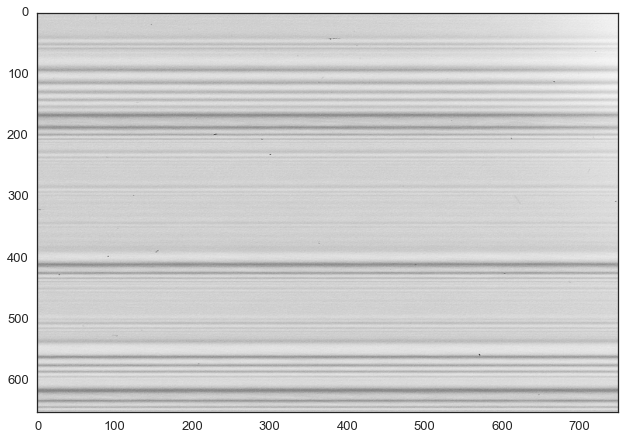

In [61]:
plt.imshow(subframe)

In [62]:
from skimage import util

In [63]:
ubyted = util.img_as_ubyte(subframe)

# FFT

In [109]:
cd "/Users/klay6683/Dropbox/DDocuments/UVIS/straws/2015-02-06_Work_with_ISS_ring_images"

/Users/klay6683/Dropbox/DDocuments/UVIS/straws/2015-02-06_Work_with_ISS_ring_images


In [163]:
ring = imread('output_22_1.png', as_grey=True)[10:-30, 30:-10]

In [161]:
img.shape

(494, 665)

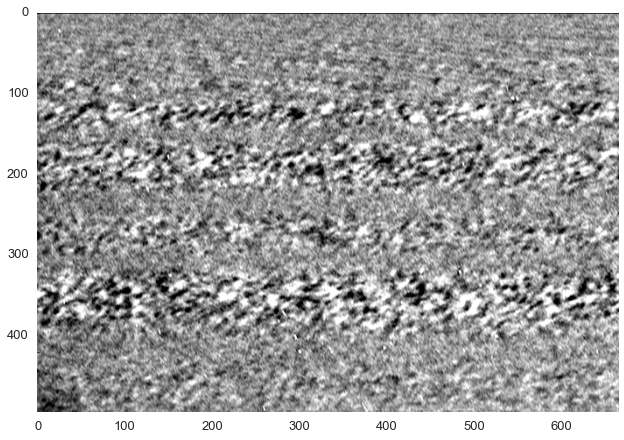

In [164]:
plt.imshow(ring)

In [179]:
from numpy import fft

In [198]:
F1 = fft.rfft2(ring)

In [199]:
F2 = fft.fftshift(F1)

In [200]:
psd2D = np.abs(F2)**2
autocorr = fft.irfft2(fft.ifftshift(psd2D))
# F2 = fftpack.fftshift(F1)

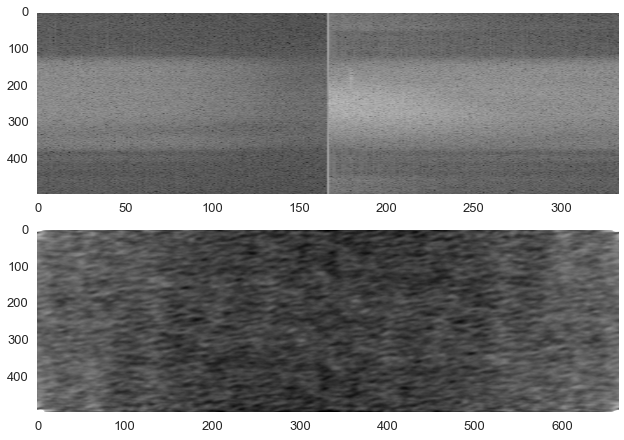

In [208]:
plt.subplot(211)
plt.imshow(np.log10(psd2D))
plt.subplot(212)
plt.imshow(autocorr, vmin=106000, vmax=108000)

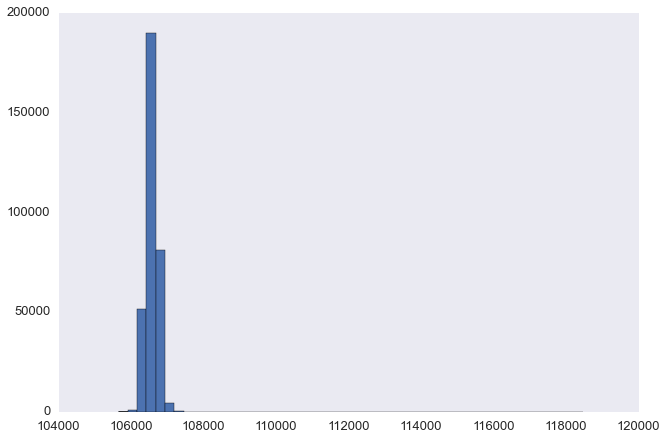

In [207]:
plt.hist(autocorr.ravel(), bins=50);

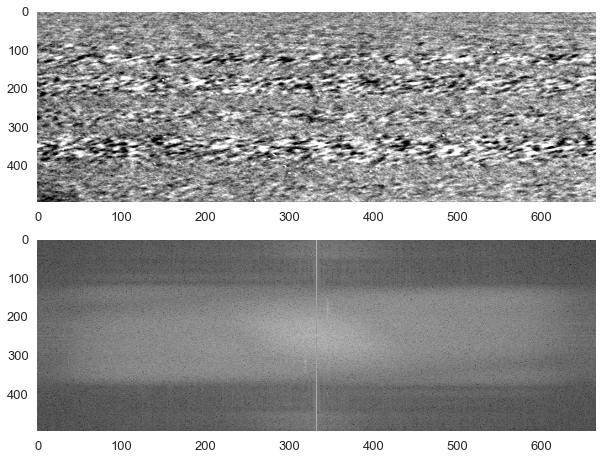

In [169]:
fig, ax = plt.subplots(nrows=2, figsize = figsize_43(10))
ax[0].imshow(ring)
ax[1].imshow(np.log10(psd2D))
fig.savefig('fft_trial.png',dpi=100)

In [155]:
img.min()

0.058823529411764705

Rotated images matched against references using Gabor filter banks:
original: brick, rotated: 30deg, match result: brick
original: brick, rotated: 70deg, match result: brick
original: grass, rotated: 145deg, match result: grass


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

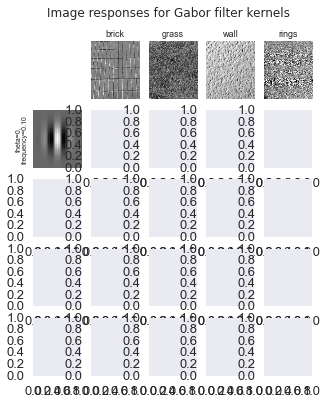

In [170]:
# %load http://scikit-image.org/docs/dev/_downloads/plot_gabor.py
"""
=============================================
Gabor filter banks for texture classification
=============================================

In this example, we will see how to classify textures based on Gabor filter
banks. Frequency and orientation representations of the Gabor filter are similar
to those of the human visual system.

The images are filtered using the real parts of various different Gabor filter
kernels. The mean and variance of the filtered images are then used as features
for classification, which is based on the least squared error for simplicity.

"""
from __future__ import print_function

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage as nd

from skimage import data
from skimage.util import img_as_float
from skimage.filters import gabor_kernel


def compute_feats(image, kernels):
    feats = np.zeros((len(kernels), 2), dtype=np.double)
    for k, kernel in enumerate(kernels):
        filtered = nd.convolve(image, kernel, mode='wrap')
        feats[k, 0] = filtered.mean()
        feats[k, 1] = filtered.var()
    return feats


def match(feats, ref_feats):
    min_error = np.inf
    min_i = None
    for i in range(ref_feats.shape[0]):
        error = np.sum((feats - ref_feats[i, :])**2)
        if error < min_error:
            min_error = error
            min_i = i
    return min_i


# prepare filter bank kernels
kernels = []
for theta in range(4):
    theta = theta / 4. * np.pi
    for sigma in (1, 3):
        for frequency in (0.05, 0.25):
            kernel = np.real(gabor_kernel(frequency, theta=theta,
                                          sigma_x=sigma, sigma_y=sigma))
            kernels.append(kernel)


shrink = (slice(0, None, 3), slice(0, None, 3))
brick = img_as_float(data.load('brick.png'))[shrink]
grass = img_as_float(data.load('grass.png'))[shrink]
wall = img_as_float(data.load('rough-wall.png'))[shrink]
image_names = ('brick', 'grass', 'wall', 'rings')
images = (brick, grass, wall, ring)

# prepare reference features
ref_feats = np.zeros((4, len(kernels), 2), dtype=np.double)
ref_feats[0, :, :] = compute_feats(brick, kernels)
ref_feats[1, :, :] = compute_feats(grass, kernels)
ref_feats[2, :, :] = compute_feats(wall, kernels)
ref_feats[3, :, :] = compute_feats(img, kernels)

print('Rotated images matched against references using Gabor filter banks:')

print('original: brick, rotated: 30deg, match result: ', end='')
feats = compute_feats(nd.rotate(brick, angle=190, reshape=False), kernels)
print(image_names[match(feats, ref_feats)])

print('original: brick, rotated: 70deg, match result: ', end='')
feats = compute_feats(nd.rotate(brick, angle=70, reshape=False), kernels)
print(image_names[match(feats, ref_feats)])

print('original: grass, rotated: 145deg, match result: ', end='')
feats = compute_feats(nd.rotate(grass, angle=145, reshape=False), kernels)
print(image_names[match(feats, ref_feats)])


def power(image, kernel):
    # Normalize images for better comparison.
    image = (image - image.mean()) / image.std()
    return np.sqrt(nd.convolve(image, np.real(kernel), mode='wrap')**2 +
                   nd.convolve(image, np.imag(kernel), mode='wrap')**2)

# Plot a selection of the filter bank kernels and their responses.
results = []
kernel_params = []
for theta in (0, 1):
    theta = theta / 4. * np.pi
    for frequency in (0.1, 0.4):
        kernel = gabor_kernel(frequency, theta=theta)
        params = 'theta=%d,\nfrequency=%.2f' % (theta * 180 / np.pi, frequency)
        kernel_params.append(params)
        # Save kernel and the power image for each image
        results.append((kernel, [power(img, kernel) for img in images]))

fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(5, 6))
plt.gray()

fig.suptitle('Image responses for Gabor filter kernels', fontsize=12)

axes[0][0].axis('off')

# Plot original images
for label, img, ax in zip(image_names, images, axes[0][1:]):
    ax.imshow(img)
    ax.set_title(label, fontsize=9)
    ax.axis('off')

for label, (kernel, powers), ax_row in zip(kernel_params, results, axes[1:]):
    # Plot Gabor kernel
    ax = ax_row[0]
    ax.imshow(np.real(kernel), interpolation='nearest')
    ax.set_ylabel(label, fontsize=7)
    ax.set_xticks([])
    ax.set_yticks([])

    # Plot Gabor responses with the contrast normalized for each filter
    vmin = np.min(powers)
    vmax = np.max(powers)
    for patch, ax in zip(powers, ax_row[1:]):
        ax.imshow(patch, vmin=vmin, vmax=vmax)
        ax.axis('off')

plt.show()
